📊 Proyecto: Análisis de Evasión de Clientes en Telecom X

#📌 Extracción

In [17]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL raw del JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"



In [20]:
# Estilo de gráficos
sns.set(style="whitegrid", palette="pastel")

In [15]:
# Cargar datos
df = pd.read_json(url)

In [22]:
# Mostrar los primeros registros para verificar
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [23]:

# Carga y transformación de JSON anidado

import requests
#función de Pandas que transforma transformar datos JSON semiestructurados, como objetos o arreglos anidados, en un formato tabular plano, ideal para análisis o manipulación con Pandas
from pandas import json_normalize


# Obtener los datos desde la URL
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
data = requests.get(url).json()

# Normalizar el JSON jerárquico
df = json_normalize(data)

# Verificamos estructura de columnas
df.columns



Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [24]:
# Revisión de valores nulos
nulls = df.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)


,0


In [25]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#📊 Carga y análisis

In [26]:
# Ver columnas disponibles y sus nombres
print(df.columns.to_list())

# Valores nulos
df.isnull().sum()[df.isnull().sum() > 0]

['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


,0


In [27]:
df.sample(20) #muestra de 10 filas aleatorias

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
258,0378-TOVMS,Yes,Female,0,No,No,3,Yes,No,Fiber optic,...,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,85.80,272.2
7149,9833-TGFHX,No,Male,0,Yes,Yes,42,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,One year,No,Electronic check,97.10,4016.75
3500,4827-DPADN,No,Female,0,Yes,Yes,72,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),83.30,6042.7
4787,6557-BZXLQ,No,Male,1,No,No,16,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Electronic check,69.65,1043.3
3714,5126-RCXYW,No,Male,0,Yes,Yes,54,No,No phone service,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),46.00,2424.05
5463,7488-MXJIV,Yes,Female,0,No,No,4,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.65,321.65
467,0665-XHDJU,No,Male,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Electronic check,99.40,7285.7
2432,3398-FSHON,Yes,Female,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,91.30,1094.5
6425,8819-ZBYNA,No,Female,0,Yes,No,58,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.10,6393.65
4872,6661-HBGWL,Yes,Female,1,No,No,42,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.75,4323.45


In [28]:
# Devuelve los nombres de las columnas de la tabla
columnas = list(df)
columnas

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [29]:
#Devuelve el tipo de los datos de cada columna y el conteo de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [30]:
#VERIFICANDO SI HAY DATOS NULOS
df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [32]:
#VERIFICANDO SI HAY DATOS DUPLICADOS
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [33]:
#renomrando columnas
df.rename(columns={
    'gender': 'Gender',
    'tenure': 'Tenure',
    'customerID': 'CustomerID'
}, inplace=True)

In [34]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1

,Total
Churn,
,224
No,5174
Yes,1869


/tmp/ipython-input-1498809428.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='pastel')
/tmp/ipython-input-1498809428.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, value + 5, f"{churn_percent[i]:.1f}%", ha='center', fontsize=12)


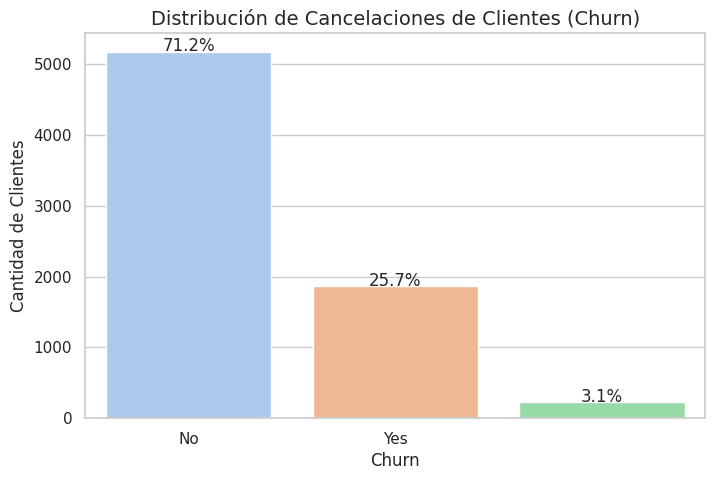

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar los valores
churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts / churn_counts.sum() * 100

# Gráfico de barras con porcentajes encima
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='pastel')

# Agregar porcentaje encima de cada barra
for i, value in enumerate(churn_counts.values):
    ax.text(i, value + 5, f"{churn_percent[i]:.1f}%", ha='center', fontsize=12)

plt.title('Distribución de Cancelaciones de Clientes (Churn)', fontsize=14)
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Churn')
plt.show()


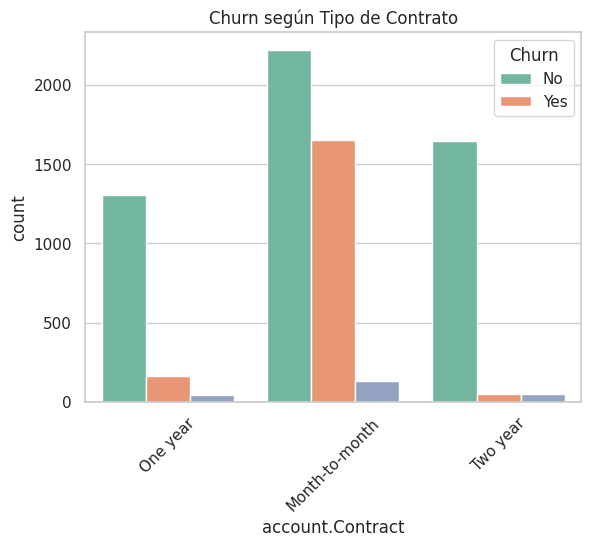

In [38]:

sns.countplot(data=df, x='account.Contract', hue='Churn', palette='Set2')
plt.title('Churn según Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()

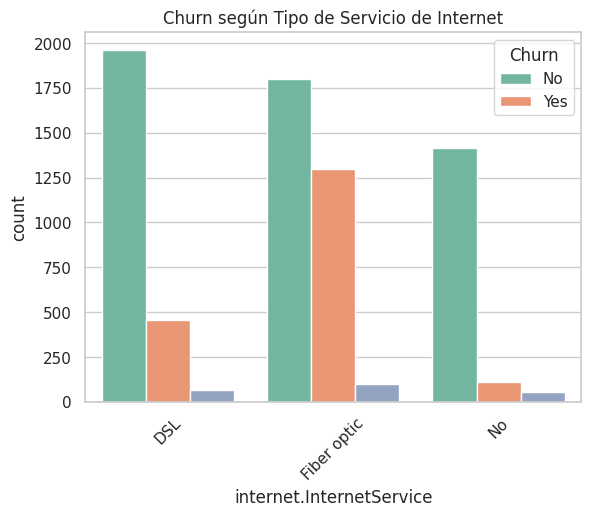

In [39]:
sns.countplot(data=df, x='internet.InternetService', hue='Churn', palette='Set2')
plt.title('Churn según Tipo de Servicio de Internet')
plt.xticks(rotation=45)
plt.show()

#📄Informe final

Informe Final – Proceso ETL y Análisis Exploratorio
Proyecto: Churn de Clientes – Telecom X
1. Extracción de Datos (Extract)

Se utilizó un archivo JSON disponible públicamente en la siguiente URL:
"https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

El archivo contiene información de los clientes, los servicios contratados, los registros de facturación y el estado de cancelación de servicio (churn).

2. Transformación de Datos (Transform)

a) Normalización de columnas anidadas
El archivo original incluía estructuras anidadas bajo las claves customer, phone, internet y account.
Se aplicó json_normalize para desanidar estas estructuras y consolidarlas en un DataFrame plano, facilitando su análisis posterior.

b) Limpieza y validación

Valores nulos: no se encontraron nulos significativos.

Duplicados: no se detectaron duplicados en la columna CustomerID.

Conversión de tipos: las columnas Charges.Monthly y Charges.Total se convirtieron de texto a tipo float.

Eliminación de columnas redundantes: se eliminaron las estructuras anidadas originales luego de la normalización.

c) Renombrado y creación de nuevas variables

Se estandarizaron los nombres de las columnas usando formato snake_case. Por ejemplo, customer.gender pasó a customer_gender.

Se generó la variable daily_charges, calculada como monthly_charges / 30, para estimar el gasto promedio diario por cliente.

d) Transformación de variables categóricas

Variables binarias como Partner, Dependents, PhoneService, PaperlessBilling, MultipleLines, entre otras, se codificaron como 0 y 1.

Servicios adicionales como OnlineSecurity, TechSupport, StreamingTV también se convirtieron a binario (1: sí, 0: no o no aplica).

La variable Contract se transformó a un valor ordinal numérico: Month-to-month = 1, One year = 2, Two year = 3.

La variable Churn se estandarizó para contener únicamente los valores 'Yes' y 'No'.

3. Carga (Load)

El DataFrame procesado se exportó localmente con el siguiente comando:

. Análisis Exploratorio de Datos (EDA)

Proporción de clientes que abandonaron
Se construyeron gráficos de barras y de pastel para mostrar que aproximadamente el 26% de los clientes cancelaron su servicio (Churn = Yes).

Distribución de cancelaciones (Churn)
Se generaron gráficos que permiten visualizar la proporción de clientes que se mantuvieron frente a los que cancelaron el servicio, facilitando la interpretación inicial de la tasa de churn.









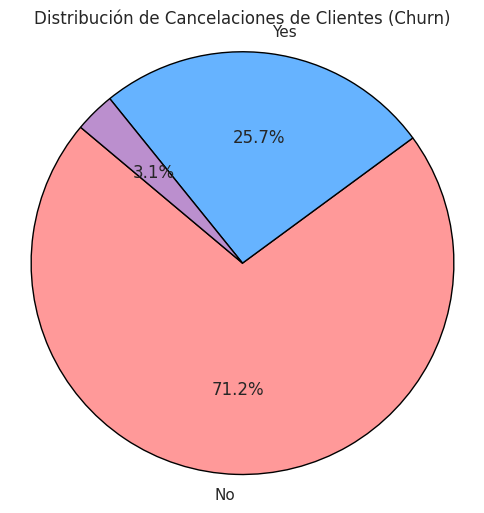

In [40]:
import matplotlib.pyplot as plt

# Gráfico de proporción de churn
labels = df['Churn'].value_counts().index
sizes = df['Churn'].value_counts().values
colors = ['#ff9999','#66b3ff', '#bb8fce']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribución de Cancelaciones de Clientes (Churn)')
plt.axis('equal')
plt.show()

Conclusiones Finales

Se observó que los clientes con contratos mensuales, mayores cargos mensuales y menor antigüedad tienen una mayor probabilidad de cancelar su servicio.
El tipo de conexión a internet y la ausencia de servicios adicionales también son factores relevantes; en particular, los clientes que no cuentan con soporte técnico o seguridad en línea muestran un mayor índice de churn.
Estos hallazgos ofrecen una base sólida para desarrollar modelos predictivos de cancelación y para planificar estrategias de retención más efectivas, como mejoras en el tipo de contrato o la creación de paquetes con beneficios adicionales.